In [61]:
# CONTAINS ALL NECESSARY FUNCTIONALITY FOR THIS EXERCISE:
from Modules import OIP20_lib_ImageProcessing_V7_16bit as ip  
# (for this to work, you need:
#  * a subfolder named "Modules" in your Notebook folder
#  * in this subdfolder you need an empty file named "__init__.py"
#  * and of course the library (.py file) named "OIP20_lib_ImageProcessing_V1.py")

# if you want to use other functionality here, you need to load the libraries again: 
import matplotlib.pyplot as plt # We need this here only for closing the open windows
import numpy as np # we want to use some math...
import matplotlib.image as mpimg
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.io import imread_collection
from Modules import tictoc as t

# for nice(r) potting in the notebook
%matplotlib inline 

##  If not in Jupyter: close all open plots (otherwise you will get tons of them after some time...)
# plt.close("all")

# Some house holding: 
#  Higher resolution for figures:
%config InlineBackend.figure_format = 'retina' # (doubles the plot dpi)

# for interactive graphing: 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [70]:
def add_diff_array(A, B):
    # if array A shorter than array B, then extend A and add to B
    if len(A) < len(B):
        C = B.copy()
        C[:len(A)] += A
    else:
        C = A.copy()
        C[:len(B)] += B
    return C

In [71]:
particles_frequency_001 = np.load('./images/dataset/001_particles.npy')
diamter_frequency_001 = np.load('./images/dataset/001_diameter.npy')

In [72]:
particles_frequency_006 = np.load('./images/dataset/006_particles.npy')
diamter_frequency_006 = np.load('./images/dataset/006_diameter.npy')

In [73]:
particles_frequency = add_diff_array(particles_frequency_001,particles_frequency_006)
diamter_frequency = add_diff_array(diamter_frequency_001,diamter_frequency_006)

In [74]:
from matplotlib.ticker import MaxNLocator

def plot_result(result, xlabel='x', ylabel='y'):
    fig, ax = plt.subplots(1,3,figsize=(20,5))
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel, color='tab:blue')
    ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
    
    counts, bins = np.histogram(result)
    ax[0].hist(bins[:-1], bins, weights=counts)
    
    ax[1].set_xlabel(xlabel)
    ax[1].set_ylabel(ylabel, color='tab:blue')
    ax[1].boxplot(result, vert=False)
    ax[2].set_xlabel(xlabel)
    ax[2].set_ylabel(ylabel, color='tab:blue')
    ax[2].violinplot(result, vert=False)
    plt.show() 

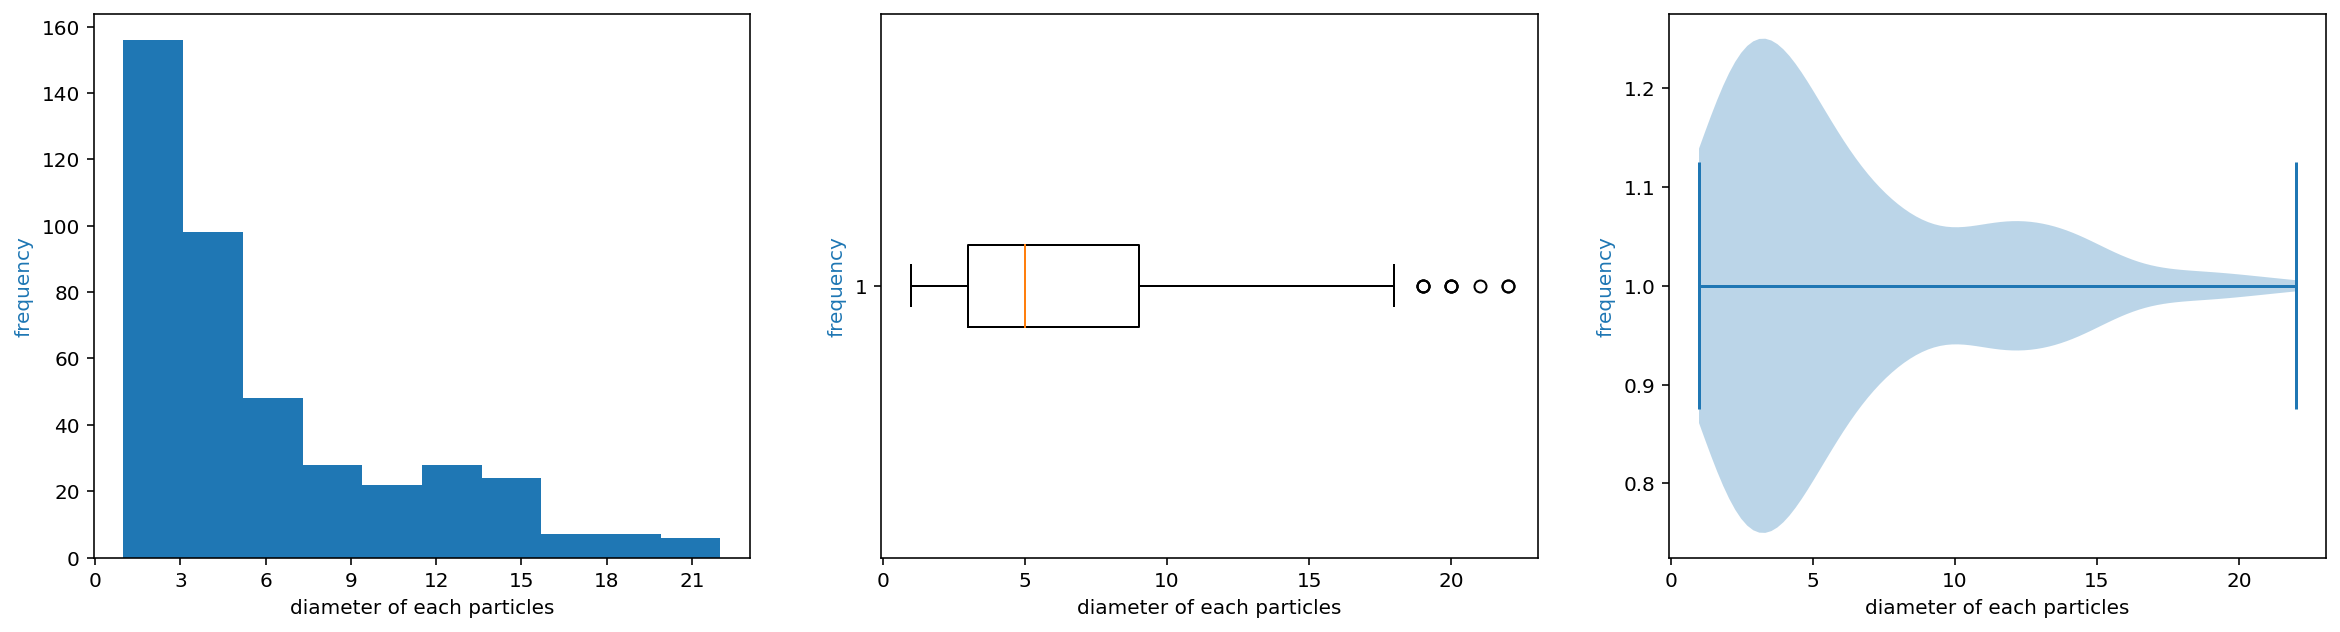

In [75]:
plot_result(particles_frequency, xlabel='diameter of each particles', ylabel='frequency')

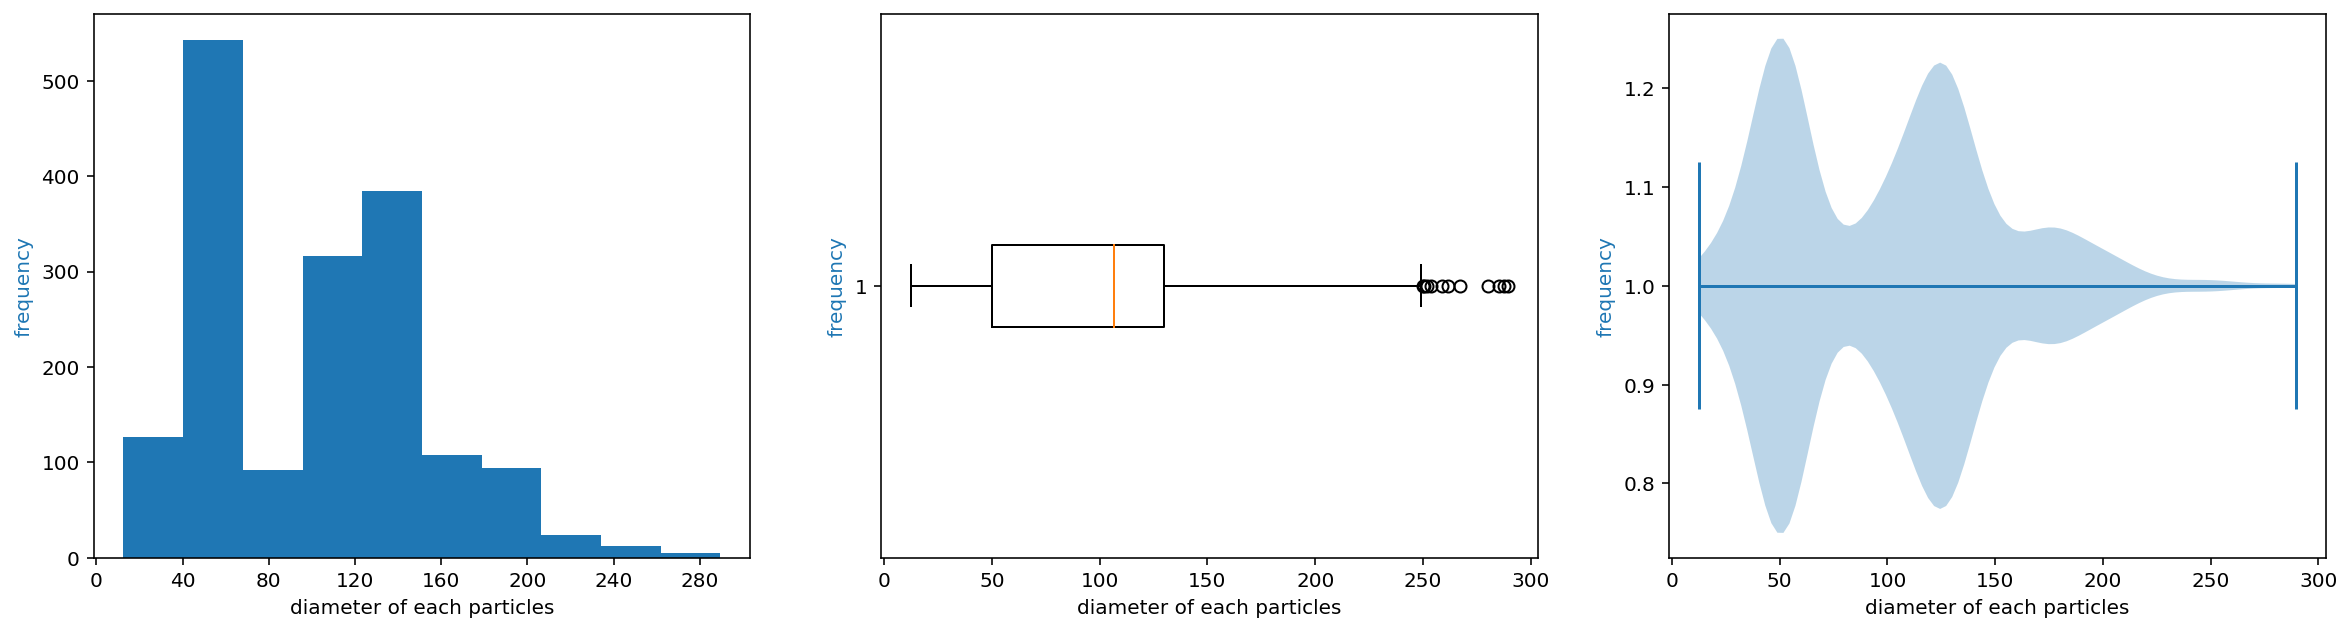

In [76]:
plot_result(diamter_frequency, xlabel='diameter of each particles', ylabel='frequency')